In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from keras.utils.vis_utils import plot_model

from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/'Machine Learning'/Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning/Project


### Data

In [3]:
def load_data(filename):
  # Load data set
  df = pd.read_csv(filename, sep=";", index_col=0)
  df = df.iloc[:,1:]

  # Shuffle the samples
  df = shuffle(df)

  # Separate labels and features
  X = df[['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HomeTeamLP', 'AwayTeamLP']]
  y = df['FTR']

  # Encode labels
  label_encoder = preprocessing.LabelEncoder()
  y = label_encoder.fit_transform(y)

  # Normalize features
  X = preprocessing.normalize(X)

  # Split into training, validation and test sub sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

  return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [15]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_data('soccer_data.csv')

# Resize the features
X_train = np.resize(X_train,(X_train.shape[0], 1, X_train.shape[1]))
X_val = np.resize(X_val,(X_val.shape[0], 1, X_val.shape[1]))
X_test = np.resize(X_test,(X_test.shape[0], 1, X_test.shape[1]))

In [16]:
print(X_train.shape, X_val.shape, X_test.shape)

(3840, 1, 6) (960, 1, 6) (1200, 1, 6)


In [6]:
def plot_data(filename):
  df = pd.read_csv(filename, sep=";", index_col=0)
  df = df.iloc[:,1:]

  # Plot histogram
  plt.figure(1)
  df['FTR'].value_counts().plot(kind='bar')
  plt.title('Labels histogram')
  plt.savefig('/content/drive/MyDrive/Machine Learning/Project/label_hist')

  # Feature correlations
  sns.pairplot(df, hue ='FTR')
  plt.savefig('/content/drive/MyDrive/Machine Learning/Project/features_correlation')
  plt.show()

### **Results**

In [7]:
def plot_results(history, filename):
    
  epochs = range(1, len(history.history['loss']) + 1)
  
  # Loss
  plt.subplot(211)
  plt.plot(epochs, history.history['loss'], 'b--', label='Training loss')
  plt.plot(epochs, history.history['val_loss'], 'r', label='Validaton loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and validation loss')
  plt.legend()
  
  # Accuracy
  plt.subplot(212)
  plt.plot(epochs, history.history['accuracy'], 'b--', label='Training accuracy')
  plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validaton accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  
  plt.tight_layout()

  # Save the plot
  plt.savefig('/content/drive/MyDrive/Machine Learning/Project/' + filename + '.png')

### **RNN model**

Epoch 1/30
120/120 [==============================] - 3s 10ms/step - loss: 1.0256 - accuracy: 0.5128 - val_loss: 1.0012 - val_accuracy: 0.5042
Epoch 2/30
120/120 [==============================] - 1s 6ms/step - loss: 0.9909 - accuracy: 0.5263 - val_loss: 0.9930 - val_accuracy: 0.5021
Epoch 3/30
120/120 [==============================] - 1s 7ms/step - loss: 0.9835 - accuracy: 0.5271 - val_loss: 1.0227 - val_accuracy: 0.4792
Epoch 4/30
120/120 [==============================] - 1s 7ms/step - loss: 0.9842 - accuracy: 0.5258 - val_loss: 0.9856 - val_accuracy: 0.5063
Epoch 5/30
120/120 [==============================] - 1s 6ms/step - loss: 0.9810 - accuracy: 0.5297 - val_loss: 0.9926 - val_accuracy: 0.5073
Epoch 6/30
120/120 [==============================] - 1s 6ms/step - loss: 0.9819 - accuracy: 0.5305 - val_loss: 0.9892 - val_accuracy: 0.5083
Epoch 7/30
120/120 [==============================] - 1s 6ms/step - loss: 0.9804 - accuracy: 0.5299 - val_loss: 0.9866 - val_accuracy: 0.5083
Epoch

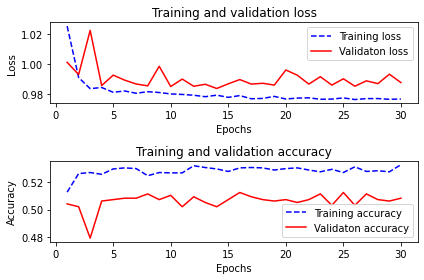

In [8]:
# Hyper-parameters
epochs = 30
batch_size = 32

model = Sequential()
model.add(SimpleRNN(128))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])
    
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    verbose=1)

model.summary()

model.save('/content/drive/MyDrive/Machine Learning/Project/model_RNN.h5')

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: %.3f' % (accuracy * 100.0))

# Plot model
plot_model(model, to_file='/content/drive/MyDrive/Machine Learning/Project/model_RNN.png', show_shapes=True, show_layer_names=True)

# Plot results
plot_results(history, 'results_RNN')

### **LSTM model**

Epoch 1/30
120/120 [==============================] - 4s 8ms/step - loss: 1.0664 - accuracy: 0.4560 - val_loss: 1.0540 - val_accuracy: 0.4563
Epoch 2/30
120/120 [==============================] - 1s 4ms/step - loss: 1.0373 - accuracy: 0.4570 - val_loss: 1.0225 - val_accuracy: 0.4573
Epoch 3/30
120/120 [==============================] - 1s 5ms/step - loss: 1.0094 - accuracy: 0.5146 - val_loss: 0.9989 - val_accuracy: 0.5083
Epoch 4/30
120/120 [==============================] - 1s 5ms/step - loss: 0.9949 - accuracy: 0.5258 - val_loss: 0.9899 - val_accuracy: 0.5156
Epoch 5/30
120/120 [==============================] - 1s 5ms/step - loss: 0.9903 - accuracy: 0.5250 - val_loss: 0.9858 - val_accuracy: 0.5146
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.9871 - accuracy: 0.5284 - val_loss: 0.9917 - val_accuracy: 0.5073
Epoch 7/30
120/120 [==============================] - 1s 5ms/step - loss: 0.9857 - accuracy: 0.5263 - val_loss: 0.9950 - val_accuracy: 0.5135
Epoch 

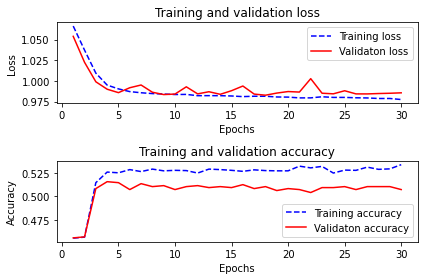

In [9]:
# Hyper-parameters
epochs = 30
batch_size = 32

model = Sequential()
model.add(LSTM(50))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    verbose=1)

model.summary()

model.save('/content/drive/MyDrive/Machine Learning/Project/model_LSTM.h5')

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: %.3f' % (accuracy * 100.0))

# Plot model
plot_model(model, to_file='/content/drive/MyDrive/Machine Learning/Project/model_LSTM.png', show_shapes=True, show_layer_names=True)

# Plot results
plot_results(history, 'results_LSTM')